In [1]:
import pandas as pd
import numpy as np
table1 = pd.read_csv('./filtered_table1.csv', index_col=0)
table2 = pd.read_csv('./filtered_table2.csv', index_col=0)
seg_dup = pd.read_csv('./seg_dup.csv', index_col=0)

In [2]:
segs_dup = seg_dup[['chromStart', 'chromEnd']].to_numpy()

qvalue seggest removing 0 rows


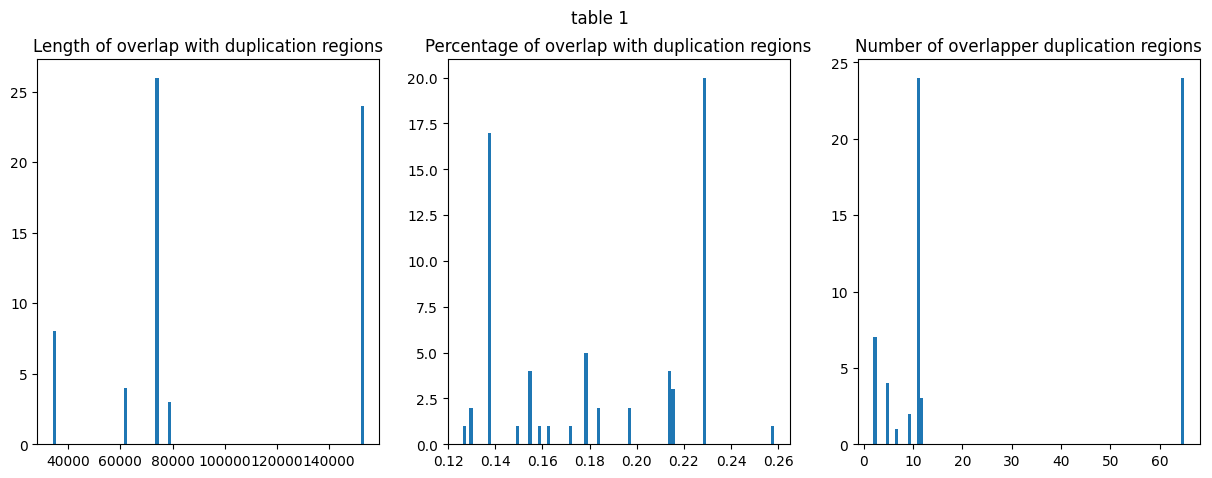

In [3]:
# check intersection between table1 in seg_dup
segs_table1 = table1[['Chromosome', 'Start', 'End']].to_numpy()
seg_sizes = []
seg_ids = []
for seg in segs_table1:
    seg_size = 0
    seg_id = []
    if seg[0] == 6:
        for dup_id in range(len(segs_dup)):
            dup = segs_dup[dup_id]
            if seg[1] <= dup[1] and seg[2] >= dup[0]:
                seg_size += min(seg[2], dup[1]) - max(seg[1], dup[0])
                seg_id.append(dup_id)
    seg_sizes.append(seg_size)
    seg_ids.append(seg_id)

table1['seg_size'] = seg_sizes
table1['seg_number'] = [len(x) for x in seg_ids]
table1['seg_ids'] = seg_ids
table1['seg_size_portion'] = table1['seg_size'] / table1['Length']

# plot distribution of seg_size, seg_number, seg_size_portion as 1*3 subplots
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist(table1.query('Chromosome==6')['seg_size'], bins=100)
ax[0].set_title('Length of overlap with duplication regions')
ax[1].hist(table1.query('Chromosome==6')['seg_size_portion'], bins=100)
ax[1].set_title('Percentage of overlap with duplication regions')
ax[2].hist(table1.query('Chromosome==6')['seg_number'], bins=100)
ax[2].set_title('Number of overlapper duplication regions')
# add super title
fig.suptitle('table 1')

# calculate the significance of seg size by individual lengths in dup segs
dup_region_sizes = segs_dup[:, 1] - segs_dup[:, 0]
# calculate the significance of seg size by individual lengths in dup segs
seg_sizes = table1['seg_size'].to_numpy()
p_values = []
from scipy import stats
from statsmodels.stats.multitest import multipletests
for seg_size in seg_sizes:
    p_values.append(stats.distributions.norm.sf(seg_size, dup_region_sizes.mean(), dup_region_sizes.std()) )
_, p_adjusted, _, _ = multipletests(p_values, method='fdr_bh')
table1['dup_overlap_pvalue'] = p_values
table1['dup_overlap_qvalue'] = p_adjusted
print('qvalue seggest removing', table1.query('dup_overlap_qvalue<0.05').shape[0], 'rows')
table1.to_csv('./table1_analyzed.csv')

qvalue seggest removing 0 rows


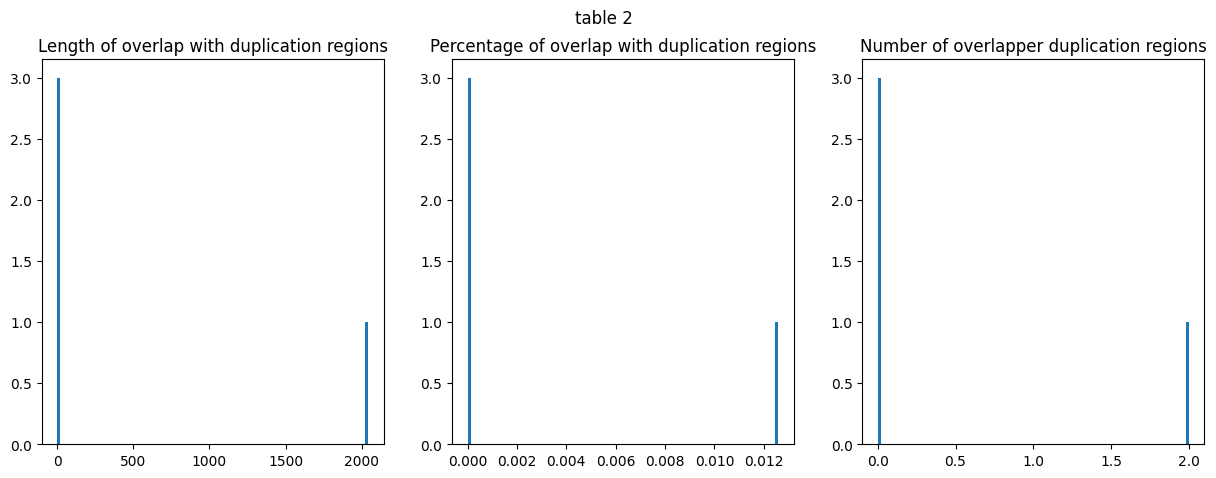

In [4]:
seg_table2 = table2[['Chromosome', 'Start', 'End']].to_numpy()
seg_sizes = []
seg_ids = []
for seg in seg_table2:
    seg_size = 0
    seg_id = []
    if seg[0] == 6:
        for dup_id in range(len(segs_dup)):
            dup = segs_dup[dup_id]
            if seg[1] <= dup[1] and seg[2] >= dup[0]:
                seg_size += min(seg[2], dup[1]) - max(seg[1], dup[0])
                seg_id.append(dup_id)
    seg_sizes.append(seg_size)
    seg_ids.append(seg_id)
table2['seg_size'] = seg_sizes
table2['seg_number'] = [len(x) for x in seg_ids]
table2['seg_ids'] = seg_ids
table2['seg_size_portion'] = table2['seg_size'] / table2['Length']

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist(table2.query('Chromosome==6')['seg_size'], bins=100)
ax[0].set_title('Length of overlap with duplication regions')
ax[1].hist(table2.query('Chromosome==6')['seg_size_portion'], bins=100)
ax[1].set_title('Percentage of overlap with duplication regions')
ax[2].hist(table2.query('Chromosome==6')['seg_number'], bins=100)
ax[2].set_title('Number of overlapper duplication regions')
fig.suptitle('table 2')


# calculate the significance of seg size by individual lengths in dup segs
seg_sizes = table2['seg_size'].to_numpy()
p_values = []
for seg_size in seg_sizes:
    p_values.append(stats.distributions.norm.sf(seg_size, dup_region_sizes.mean(), dup_region_sizes.std()) )
_, p_adjusted, _, _ = multipletests(p_values, method='fdr_bh')
table2['dup_overlap_pvalue'] = p_values
table2['dup_overlap_qvalue'] = p_adjusted
print('qvalue seggest removing', table2.query('dup_overlap_qvalue<0.05').shape[0], 'rows')
table2.to_csv('./table2_analyzed.csv')


In [14]:
table2.sort_values('seg_size')

,Chromosome,Start,End,Length,MHC region?,Average of Pa,Standard deviation of Pa,p-value,Corrected p-value (FDR/BH method),seg_size,seg_number,seg_ids,seg_size_portion,dup_overlap_pvalue,dup_overlap_qvalue
Race,,,,,,,,,,,,,,,
GIH,3,157950988,158348010,397022,No,0.061075,0.029004,5.368670e-03,1.315324e-02,0,0,[],0.000000,5.404370e-01,5.404370e-01
LWK,14,105863438,106385732,522294,No,0.064520,0.033310,6.130000e-05,1.201796e-03,0,0,[],0.000000,5.404370e-01,5.404370e-01
LWK,10,102847077,103283225,436148,No,0.058774,0.018805,9.436036e-03,1.778330e-02,0,0,[],0.000000,5.404370e-01,5.404370e-01
LWK,9,64439637,65054326,614689,No,0.059009,0.029505,7.998330e-03,1.599666e-02,0,0,[],0.000000,5.404370e-01,5.404370e-01
LWK,2,93680283,94160185,479902,No,0.057041,0.015056,2.885918e-02,3.213863e-02,0,0,[],0.000000,5.404370e-01,5.404370e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CDX,11,50311095,50728899,417804,No,0.063723,0.018791,2.867257e-02,3.213863e-02,0,0,[],0.000000,5.404370e-01,5.404370e-01
CDX,8,70075248,70483016,407768,No,0.064305,0.021759,2.020568e-02,2.591377e-02,0,0,[],0.000000,5.404370e-01,5.404370e-01
BEB,15,77138940,77566277,427337,No,0.049670,0.016189,1.532069e-02,2.314762e-02,0,0,[],0.000000,5.404370e-01,5.404370e-01
